<a href="https://colab.research.google.com/github/Dkepffl/2022-2-ESAA/blob/main/Project(2)/People_Kprototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 구글 드라이브 어마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **데이터셋 불러오기**

In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/22-2 ESAA OB 1조/OB 프로젝트(2)/Data/marketing_campaign.csv', sep='\t') # 구분자가 tab 키

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## **데이터 전처리 및 가공**

### **데이터 가공을 위한 데이터프레임 복사**
- People 속성에 해당하는 컬럼들먼 추출
- 이후 해당 데이터 프레임에 RFM 기반의 Frequency와 Monetary 컬럼을 추가할 예정

In [ ]:
df_People = df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer']].copy()
df_People.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014


### **RFM 기반으로 데이터 가공**
* Recency: 주문 기간
* Frequency :  주문 횟수
* Monetary : 주문 금액


In [ ]:
# Recency
df_People['Recency'] = df['Recency'].copy()
df_People.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94


In [ ]:
# Frequency
df_People['Frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df_People.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Frequency
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,22
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,4
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,20
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,14


In [ ]:
# Monetary
df_People['Monetary'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df_People.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Frequency,Monetary
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,22,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,4,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,20,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,6,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,14,422


### **Year_Birth 컬럼을 Age 컬럼으로 변환**


In [ ]:
df_People['Age'] = 2022 - df['Year_Birth']
df_People.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Frequency,Monetary,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,22,1617,65
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,4,27,68
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,20,776,57
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,6,53,38
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,14,422,41


In [ ]:
df_People.drop('Year_Birth', axis=1, inplace=True)

### **Education 컬럼 그룹화**
범주의 개수가 많아, 고등학교 졸업, 대학교 졸업, 석박사 이상으로 그룹화

In [ ]:
# Education 컬럼 그룹화 및 라벨 인코딩
def Edu_level(x):
  if (x=='2n Cycle') or (x=='Basic'):
    return 0
  elif x=='Graduation':
    return 1
  else:
    return 2

In [ ]:
df_People['Education']=df_People['Education'].apply(Edu_level)
df_People.head(3)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Frequency,Monetary,Age
0,5524,1,Single,58138.0,0,0,04-09-2012,58,22,1617,65
1,2174,1,Single,46344.0,1,1,08-03-2014,38,4,27,68
2,4141,1,Together,71613.0,0,0,21-08-2013,26,20,776,57


In [ ]:
df_People['Education'].value_counts() 

1    1127
2     856
0     257
Name: Education, dtype: int64

### **Marital_Status 컬럼 그룹화**
동거인 유무에 따라서, 없으면 0, 있으면 1

In [ ]:
def Mari_level(x):
  if (x=='Married') or (x=='Together'):
    return 1
  else:
    return 0

In [ ]:
df_People['Marital_Status']=df_People['Marital_Status'].apply(Mari_level)
df_People.head(3)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Frequency,Monetary,Age
0,5524,1,0,58138.0,0,0,04-09-2012,58,22,1617,65
1,2174,1,0,46344.0,1,1,08-03-2014,38,4,27,68
2,4141,1,1,71613.0,0,0,21-08-2013,26,20,776,57


In [ ]:
df_People['Marital_Status'].value_counts()

1    1444
0     796
Name: Marital_Status, dtype: int64

### **Income 컬럼 결측치 처리**
해당 컬럼의 분포가 정규 분포에 가까워 평균값으로 대체

In [ ]:
mu = np.mean(df_People['Income'])
df_People['Income'].fillna(mu, inplace=True)

In [ ]:
# 결측치가 없어졌는지 확인
sum(df_People['Income'].isnull())

0

### **자녀 수를 나타내는 Children 컬럼 생성**
Kidhome과 Teenhome 컬럼을 이용하여 자녀 수를 나타내는 변수 생성

In [ ]:
df_People['Children']=df_People['Kidhome']+df_People['Teenhome']
df_People.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

### **Dt_Customer 컬럼 변환**
- 해당 컬럼은 날짜 데이터
- datetime으로 변환 후, 기간으로 변환하여 `Days_Customer` 컬럼에 저장

In [ ]:
# datetime으로 변환
from datetime import datetime
df_People['Dt_Customer'] = pd.to_datetime(df_People['Dt_Customer'])

In [ ]:
Recent = df_People['Dt_Customer'].max()
df_People['Days_Customer'] = (Recent - df_People['Dt_Customer']).dt.days
df_People.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Frequency,Monetary,Age,Children,Days_Customer
0,5524,1,0,58138.0,2012-04-09,58,22,1617,65,0,971
1,2174,1,0,46344.0,2014-08-03,38,4,27,68,2,125
2,4141,1,1,71613.0,2013-08-21,26,20,776,57,0,472
3,6182,1,1,26646.0,2014-10-02,26,6,53,38,1,65
4,5324,2,1,58293.0,2014-01-19,94,14,422,41,1,321


In [ ]:
df_People.drop('Dt_Customer', axis=1, inplace=True)

### **각 컬럼별 이상치 제거**

In [ ]:
df_People.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2240 non-null   int64  
 1   Education       2240 non-null   int64  
 2   Marital_Status  2240 non-null   int64  
 3   Income          2240 non-null   float64
 4   Recency         2240 non-null   int64  
 5   Frequency       2240 non-null   int64  
 6   Monetary        2240 non-null   int64  
 7   Age             2240 non-null   int64  
 8   Children        2240 non-null   int64  
 9   Days_Customer   2240 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 175.1 KB


In [ ]:
numeric_features = ['ID', 'Income', 'Recency', 'Age', 'Days_Customer', 'Frequency', 'Monetary']
categorical_index = [1, 2, 6]

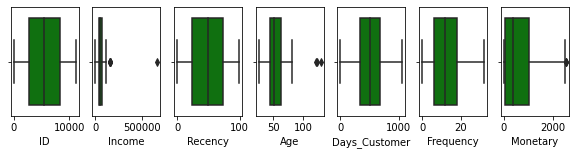

In [ ]:
plt.figure(figsize=(10,2))
i=1

for fea in numeric_features :
    plt.subplot(1, 7,i)
    sns.boxplot(x=fea, data=df_People, color='g')
    i+=1
plt.show()

- `Income`과 `Age` 컬럼에 이상치 존재

In [ ]:
def remove_IQR(col):
  Q1 = df_People[col].quantile(0.25)
  Q3 = df_People[col].quantile(0.75)
  IQR = Q3-Q1

  upper = Q3 + 1.5*IQR
  lower = Q1 - 1.5*IQR
  
  idx = list(df_People[(df_People[col] > upper) | (df_People[col]<lower)].index)
  df_People.drop(idx, axis=0, inplace=True)

In [ ]:
remove_IQR('Income')
remove_IQR('Age')
remove_IQR('Monetary')

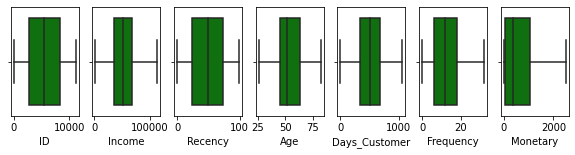

In [ ]:
plt.figure(figsize=(10,2))
i=1

for fea in numeric_features :
    plt.subplot(1, 7, i)
    sns.boxplot(x=fea, data=df_People, color='g')
    i+=1
plt.show()

### **각 컬럼별 분포 확인 후 로그 변환**

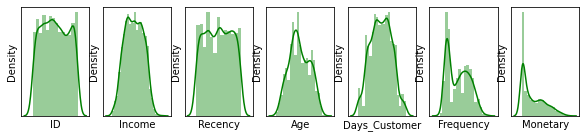

In [ ]:
plt.figure(figsize=(10,2))
i=1

for fea in numeric_features :
    plt.subplot(1, 7, i)
    sns.distplot(df_People[fea], color='g')
    plt.xticks([])
    plt.yticks([])
    i+=1
plt.show()

In [ ]:
df_People_log= df_People.copy()
for fea in numeric_features :
  df_People_log[fea] = np.log1p(df_People[fea])

### **스케일링**

In [ ]:
df_People_scaled = df_People_log.copy()
df_People_scaled.head(3)

,ID,Education,Marital_Status,Income,Recency,Frequency,Monetary,Age,Children,Days_Customer
0,8.617039,1,0,10.970592,4.077537,3.135494,7.388946,4.189655,0,6.879356
1,7.684784,1,0,10.743869,3.663562,1.609438,3.332205,4.234107,2,4.836282
2,8.328934,1,1,11.179046,3.295837,3.044522,6.655440,4.060443,0,6.159095


In [ ]:
def normalize(col):
  return (df_People[col]-df_People[col].mean())/np.sqrt(df_People[col].var())

In [ ]:
for fea in numeric_features:
  df_People_scaled[fea] = normalize(fea)

In [ ]:
df_People_scaled.head(3)

,ID,Education,Marital_Status,Income,Recency,Frequency,Monetary,Age,Children,Days_Customer
0,-0.020658,1,0,0.318967,0.306695,1.318186,1.697746,1.014611,0,1.974144
1,-1.052695,1,0,-0.254456,-0.383950,-1.189509,-0.964281,1.271251,2,-1.666855
2,-0.446720,1,1,0.974119,-0.798338,1.039553,0.289718,0.330236,0,-0.173443


In [ ]:
# 컬럼 순서 재정렬
reorder_col = ['ID', 'Education', 'Marital_Status', 'Income', 'Recency', 'Age', 'Children', 'Days_Customer', 'Frequency', 'Monetary']

df_People_scaled = df_People_scaled[reorder_col]
df_People_scaled.head()

,ID,Education,Marital_Status,Income,Recency,Age,Children,Days_Customer,Frequency,Monetary
0,-0.020658,1,0,0.318967,0.306695,1.014611,0,1.974144,1.318186,1.697746
1,-1.052695,1,0,-0.254456,-0.383950,1.271251,2,-1.666855,-1.189509,-0.964281
2,-0.446720,1,1,0.974119,-0.798338,0.330236,0,-0.173443,1.039553,0.289718
3,0.182052,1,1,-1.212170,-0.798338,-1.295155,1,-1.925082,-0.910876,-0.920751
4,-0.082272,2,1,0.326503,1.549857,-1.038515,1,-0.823314,0.203655,-0.302960


In [ ]:
df_People_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2226 non-null   float64
 1   Education       2226 non-null   int64  
 2   Marital_Status  2226 non-null   int64  
 3   Income          2226 non-null   float64
 4   Recency         2226 non-null   float64
 5   Age             2226 non-null   float64
 6   Children        2226 non-null   int64  
 7   Days_Customer   2226 non-null   float64
 8   Frequency       2226 non-null   float64
 9   Monetary        2226 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 191.3 KB


In [ ]:
X = df_People_scaled.values

## **K-prototypes을 이용한 군집화**

In [ ]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### **군집 개수별 실루엣 계수 시각화 함수**

In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_clu in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KPrototypes(n_clusters=n_clu, init='Huang', random_state=42, n_jobs=-1)
        cluster_labels = clusterer.fit_predict(X_features, categorical=categorical_index)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_clu)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_clu + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_clu):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_clu)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

#### **군집 개수 최적화**

In [ ]:
# Silhouette score
from sklearn.metrics import silhouette_score
n_range=list(range(1, 10))

best_n=0
best_ss=0
for n in n_range:
  kpro = KPrototypes(n_clusters=n+1)
  clusters=kpro.fit_predict(X, categorical=categorical_index)

  score=silhouette_score(X, clusters)
  if score>best_ss:
    best_n=n
    best_ss=score
  
print('best cluster num:', best_n+1, ' with best silhouette score: ', best_ss)

best cluster num: 2  with best silhouette score:  0.2429165623395034


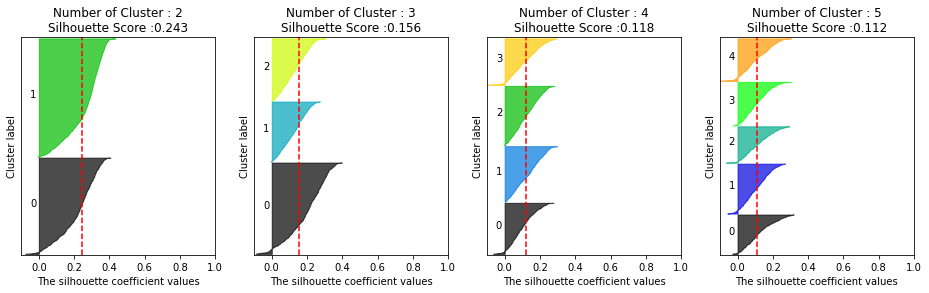

In [ ]:
visualize_silhouette([2, 3, 4, 5], X)

- 군집 개수를 2개로 설정하였다.

#### **군집화**

In [ ]:
KPro = KPrototypes(n_clusters=2, init='Huang', random_state=42, n_jobs=-1)
cluster_labels = KPro.fit_predict(X, categorical=categorical_index)

In [ ]:
df_People['cluster'] = KPro.labels_

In [ ]:
df_People.head(3)

,ID,Education,Marital_Status,Income,Recency,Frequency,Monetary,Age,Children,Days_Customer,cluster
0,5524,1,0,58138.0,58,22,1617,65,0,971,0
1,2174,1,0,46344.0,38,4,27,68,2,125,1
2,4141,1,1,71613.0,26,20,776,57,0,472,0


## **K-prototypes 알고리즘을 이용한 군집화 결과 시각화**

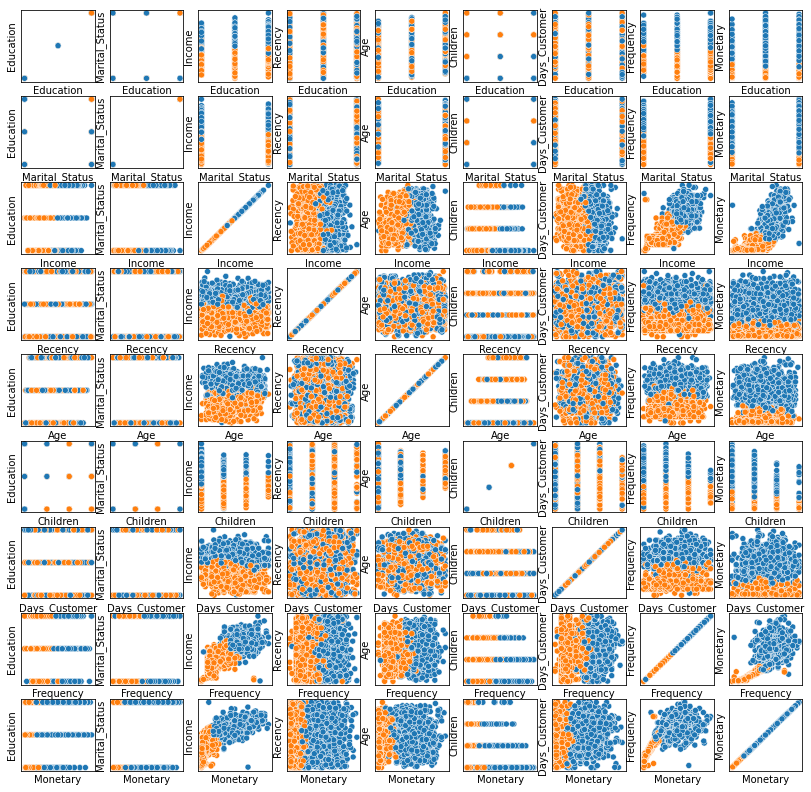

In [ ]:
plt.figure(figsize=(14, 14))
col_list = ['Education','Marital_Status', 'Income','Recency', 'Age', 'Children','Days_Customer', 'Frequency', 'Monetary']
i=1

for col1 in col_list:
  for col2 in col_list: 
    plt.subplot(9, 9,i)
    sns.scatterplot(df_People[col1], df_People[col2], hue=df_People['cluster'], legend=False)
    plt.xticks([])
    plt.yticks([])
    i+=1
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

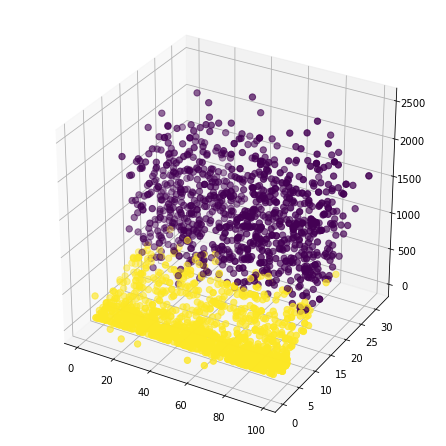

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
x=df_People['Recency']
y=df_People['Frequency']
z=df_People['Monetary']

# plot
ax.scatter(x, y, z, s=40, c=df_People['cluster'], marker='o')

- `Income`, `Frequency`, `Monetary` 컬럼을 기준으로 군집화가 잘 되어 해당 컬럼의 그래프를 따로 분리하여 확인해보았다.

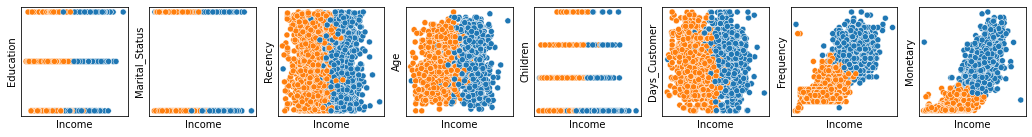

In [ ]:
# Income
fea = 'Income'
col_list = ['Education','Marital_Status', 'Income','Recency', 'Age', 'Children','Days_Customer', 'Frequency', 'Monetary']
i=1
plt.figure(figsize=(18, 2))

for col in col_list:
    if col!= fea: # 자기 자신 제외
      plt.subplot(1,8,i)
      sns.scatterplot(df_People[fea], df_People[col], hue=df_People['cluster'], legend=False)
      i+=1
    plt.xticks([])
    plt.yticks([])
    
plt.show()

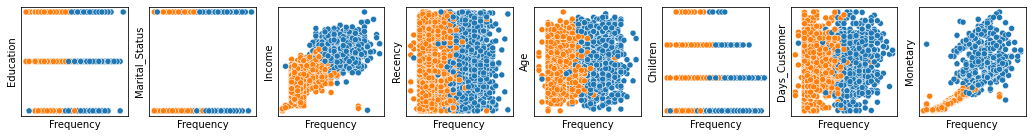

In [ ]:
# Frequency
fea = 'Frequency'
col_list = ['Education','Marital_Status', 'Income','Recency', 'Age', 'Children','Days_Customer', 'Frequency', 'Monetary']
i=1
plt.figure(figsize=(18, 2))

for col in col_list:
    if col!= fea: # 자기 자신 제외
      plt.subplot(1,8,i)
      sns.scatterplot(df_People[fea], df_People[col], hue=df_People['cluster'], legend=False)
      i+=1
    plt.xticks([])
    plt.yticks([])
    
plt.show()

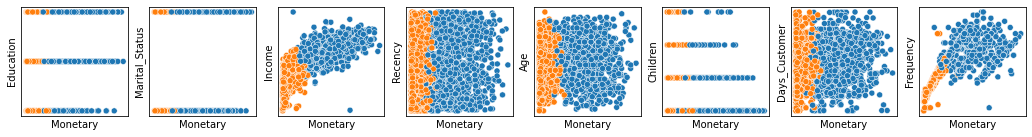

In [ ]:
# Monetary
fea = 'Monetary'
col_list = ['Education','Marital_Status', 'Income','Recency', 'Age', 'Children','Days_Customer', 'Frequency', 'Monetary']
i=1
plt.figure(figsize=(18, 2))

for col in col_list:
    if col!= fea: # 자기 자신 제외
      plt.subplot(1,8,i)
      sns.scatterplot(df_People[fea], df_People[col], hue=df_People['cluster'], legend=False)
      i+=1
    plt.xticks([])
    plt.yticks([])
    
plt.show()